# Integration of well-logging measurements to predict the slowness of the acoustic compression using the random forest regression





In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel('well.xlsx')
df

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,DownP,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb
0,1,2922.5,13.4058,8.7053,NaN,77.1874,4.5008,4.3012,71.0,23.583,...,382.2,2200.9165,1.4182,8.5,1.6100,2.4838,0.1439,NaN,NaN,NaN
1,1,2923.0,15.2468,6.4380,NaN,75.5047,6.5108,4.9543,71.0,33.721,...,382.5,1993.9286,1.4188,8.5,1.6648,2.4837,0.1503,NaN,NaN,NaN
2,1,2923.5,11.2243,6.2109,NaN,75.5697,7.6733,7.0439,71.0,34.831,...,382.7,1993.9286,1.4195,8.5,1.6856,2.4823,0.1434,NaN,NaN,NaN
3,1,2924.0,11.7085,5.9728,NaN,75.9891,10.2010,7.0977,72.0,35.166,...,383.0,1993.9286,1.4204,8.5,1.4633,2.4479,0.1458,NaN,NaN,NaN
4,1,2924.5,16.3429,6.1139,NaN,75.1929,12.8272,9.6089,72.0,34.892,...,383.1,1993.9286,1.4206,8.5,1.5418,2.4836,0.1638,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55940,15,4083.5,59.7060,NaN,NaN,68.0602,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.7590,2.4851,0.1416,0.0,0.3119,0.5884
55941,15,4084.0,58.4170,NaN,NaN,70.3944,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.6510,2.4860,0.1416,0.0,0.3145,0.5865
55942,15,4084.5,57.4990,NaN,NaN,71.9931,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5970,2.5311,0.1527,0.0,0.3129,0.6166
55943,15,4085.0,56.7850,NaN,NaN,72.7590,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4820,2.4731,0.1785,0.0,0.1410,0.7492


In [3]:
df.columns

Index(['Well', 'Depth', 'GR', 'PEF1', 'PEF2', 'DT', 'ROP', 'WOB', 'DownT',
       'Torque', 'SurfRPM', 'PumpPress', 'DownP', 'Mudflow', 'ECD', 'BS', 'RT',
       'RHOB', 'NPHI', 'Vquartz', 'Vsh', 'Vcarb'],
      dtype='object')

> we want to work on Well,Depth, GR, PEF1, RHOB, NPHI,DT, so we create new dataframe and store value of this parameters in this.

- After that we will check distribution of data in this dataframe and how many missing values it have

In [4]:
df1 = df[['Well','Depth', 'GR', 'PEF1', 'RHOB', 'NPHI','DT']]
df1

,Well,Depth,GR,PEF1,RHOB,NPHI,DT
0,1,2922.5,13.4058,8.7053,2.4838,0.1439,77.1874
1,1,2923.0,15.2468,6.4380,2.4837,0.1503,75.5047
2,1,2923.5,11.2243,6.2109,2.4823,0.1434,75.5697
3,1,2924.0,11.7085,5.9728,2.4479,0.1458,75.9891
4,1,2924.5,16.3429,6.1139,2.4836,0.1638,75.1929
...,...,...,...,...,...,...,...
55940,15,4083.5,59.7060,NaN,2.4851,0.1416,68.0602
55941,15,4084.0,58.4170,NaN,2.4860,0.1416,70.3944
55942,15,4084.5,57.4990,NaN,2.5311,0.1527,71.9931
55943,15,4085.0,56.7850,NaN,2.4731,0.1785,72.7590


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55945 entries, 0 to 55944
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Well    55945 non-null  int64  
 1   Depth   55945 non-null  float64
 2   GR      55945 non-null  float64
 3   PEF1    40009 non-null  float64
 4   RHOB    55945 non-null  float64
 5   NPHI    55945 non-null  float64
 6   DT      55945 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
df1.describe()

,Well,Depth,GR,PEF1,RHOB,NPHI,DT
count,55945.000000,55945.000000,55945.000000,40009.000000,55945.000000,55945.000000,55945.000000
mean,7.899580,3380.620549,39.671575,7.254799,2.476438,0.165747,77.363302
std,3.106089,516.053893,49.296097,1.357852,0.141847,0.095474,14.635125
min,1.000000,2552.000000,0.837900,3.168200,1.805100,0.002000,48.937100
25%,6.000000,3003.500000,10.128600,6.281000,2.406000,0.096000,66.849300
50%,7.000000,3298.600000,26.897800,7.678900,2.524000,0.142000,73.102000
75%,11.000000,3637.800000,48.846500,8.320800,2.579000,0.213600,85.562000
max,15.000000,5301.500000,1567.590000,32.537500,3.149300,0.862600,136.253000


In [7]:
df1.isnull().sum()

Well         0
Depth        0
GR           0
PEF1     15936
RHOB         0
NPHI         0
DT           0
dtype: int64

- we can see PEF1 columns have 15936 missing values, we try to fill this missing values by average value of this columns.
- values in this columns(PEF1)  go till 4 point after decimal , so we rounded average value till 4 decimal point

In [8]:
import numpy as np
a = np.round(df1['PEF1'].mean(),4)

In [9]:
df1['PEF1'].fillna(a, inplace = True)

C:\Users\Shankar\AppData\Local\Temp\ipykernel_12980\3980504937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PEF1'].fillna(a, inplace = True)


In [10]:
df1

,Well,Depth,GR,PEF1,RHOB,NPHI,DT
0,1,2922.5,13.4058,8.7053,2.4838,0.1439,77.1874
1,1,2923.0,15.2468,6.4380,2.4837,0.1503,75.5047
2,1,2923.5,11.2243,6.2109,2.4823,0.1434,75.5697
3,1,2924.0,11.7085,5.9728,2.4479,0.1458,75.9891
4,1,2924.5,16.3429,6.1139,2.4836,0.1638,75.1929
...,...,...,...,...,...,...,...
55940,15,4083.5,59.7060,7.2548,2.4851,0.1416,68.0602
55941,15,4084.0,58.4170,7.2548,2.4860,0.1416,70.3944
55942,15,4084.5,57.4990,7.2548,2.5311,0.1527,71.9931
55943,15,4085.0,56.7850,7.2548,2.4731,0.1785,72.7590


In [11]:
df1.isnull().sum()

Well     0
Depth    0
GR       0
PEF1     0
RHOB     0
NPHI     0
DT       0
dtype: int64

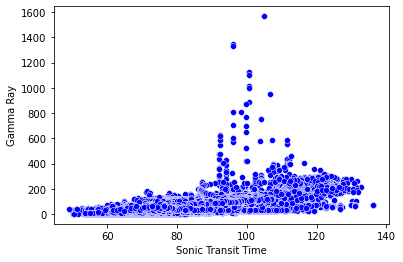

In [12]:
import seaborn as sns
sns.scatterplot(y = df1['GR'],x = df1['DT'], color = 'blue')
plt.xlabel('Sonic Transit Time')
plt.ylabel('Gamma Ray')
plt.show()

In [13]:
len(df1[df1['GR']>.75 *max(df1['GR'])])

3

- we can see most of GR log value are less than 400, except in range 70 to 110 range transit time where GR log values goes beyond 1400. This can be outliers , we want to drop this values from our our model 

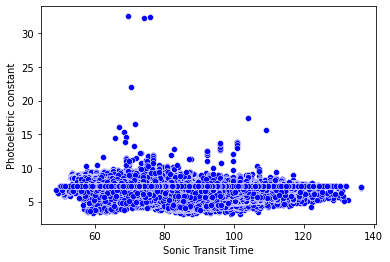

In [14]:
sns.scatterplot(y = df1['PEF1'],x = df1['DT'], color = 'blue')
plt.xlabel('Sonic Transit Time')
plt.ylabel('Photoeletric constant')
plt.show()

In [15]:
len(df1[df1['PEF1']>.75 *max(df1['PEF1'])])

3

- we can see only three value are here which are too high , we like to drop this values

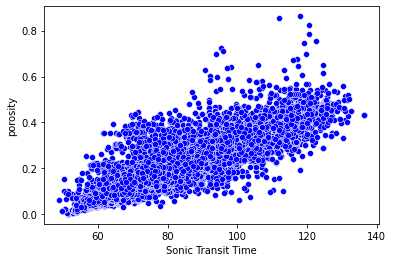

In [16]:
sns.scatterplot(y = df1['NPHI'],x = df1['DT'], color = 'blue')
plt.xlabel('Sonic Transit Time')
plt.ylabel('porosity')
plt.show()

- Here uniform distribution of data, so don't need to do anything with this data

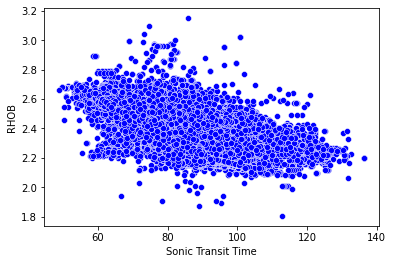

In [17]:
sns.scatterplot(y = df1['RHOB'],x = df1['DT'], color = 'blue')
plt.xlabel('Sonic Transit Time')
plt.ylabel('RHOB')
plt.show()

- Here also uniform distribution of data, so don't need to do anything with this data

In [18]:
df1 = df1[df1['PEF1']<.75 *max(df1['PEF1'])]
df1 = df1[df1['GR']<.75 *max(df1['GR'])]
df1

,Well,Depth,GR,PEF1,RHOB,NPHI,DT
0,1,2922.5,13.4058,8.7053,2.4838,0.1439,77.1874
1,1,2923.0,15.2468,6.4380,2.4837,0.1503,75.5047
2,1,2923.5,11.2243,6.2109,2.4823,0.1434,75.5697
3,1,2924.0,11.7085,5.9728,2.4479,0.1458,75.9891
4,1,2924.5,16.3429,6.1139,2.4836,0.1638,75.1929
...,...,...,...,...,...,...,...
55940,15,4083.5,59.7060,7.2548,2.4851,0.1416,68.0602
55941,15,4084.0,58.4170,7.2548,2.4860,0.1416,70.3944
55942,15,4084.5,57.4990,7.2548,2.5311,0.1527,71.9931
55943,15,4085.0,56.7850,7.2548,2.4731,0.1785,72.7590


- so we drop 6 outliers values from our dataset.
- we are ready to train our model

# Model Training

> for training we use well till 14 and for validate our model we use well 15.

- for training we split our data in train and test set to check how it's working

In [19]:
#training DataFrame
df2 = df1[df1['Well']<14]
df2

,Well,Depth,GR,PEF1,RHOB,NPHI,DT
0,1,2922.5,13.4058,8.7053,2.4838,0.1439,77.1874
1,1,2923.0,15.2468,6.4380,2.4837,0.1503,75.5047
2,1,2923.5,11.2243,6.2109,2.4823,0.1434,75.5697
3,1,2924.0,11.7085,5.9728,2.4479,0.1458,75.9891
4,1,2924.5,16.3429,6.1139,2.4836,0.1638,75.1929
...,...,...,...,...,...,...,...
52699,13,4586.5,68.1668,7.2548,2.5219,0.1587,75.0283
52700,13,4587.0,71.9559,7.2548,2.5062,0.1739,72.9614
52701,13,4587.5,67.5752,7.2548,2.5030,0.1704,75.2193
52702,13,4588.0,65.0492,7.2548,2.4855,0.1754,77.4772


In [20]:
# Validation dataframe
df3 = df1[df1['Well']>14]
df3

,Well,Depth,GR,PEF1,RHOB,NPHI,DT
54786,15,3500.0,36.374,7.2548,2.4680,0.1694,77.2473
54787,15,3500.5,27.346,7.2548,2.4460,0.1662,78.6560
54788,15,3501.0,16.766,7.2548,2.4481,0.1660,78.3028
54789,15,3501.5,19.357,7.2548,2.5120,0.1679,77.3480
54790,15,3502.0,17.445,7.2548,2.4940,0.1536,77.1519
...,...,...,...,...,...,...,...
55940,15,4083.5,59.706,7.2548,2.4851,0.1416,68.0602
55941,15,4084.0,58.417,7.2548,2.4860,0.1416,70.3944
55942,15,4084.5,57.499,7.2548,2.5311,0.1527,71.9931
55943,15,4085.0,56.785,7.2548,2.4731,0.1785,72.7590


In [21]:
X = df2.drop(['Well', 'DT'], axis = 1) ## columns without DT and well
y = df2.iloc[:, -1]     ## columns with DT
y

0        77.1874
1        75.5047
2        75.5697
3        75.9891
4        75.1929
          ...   
52699    75.0283
52700    72.9614
52701    75.2193
52702    77.4772
52703    77.1067
Name: DT, Length: 52700, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(f'testing r2 score for model {rf.score(X_test ,y_test)}')
print(f'training r2 score for model {rf.score(X_train, y_train)}')

testing r2 score for model 0.9765837083236577
training r2 score for model 0.9967376985951052


- WE are getting good model which can fit most of the dataset , according to this result we get 99.67% of training accuracy and for testing we got 97.65% accuracy of model.

In [24]:
y_pred = rf.predict(X_test)


In [25]:
from sklearn.metrics import mean_absolute_error
print(f'mean abosulte error on testing test {mean_absolute_error(y_test, y_pred)}')

mean abosulte error on testing test 1.0012820517077794


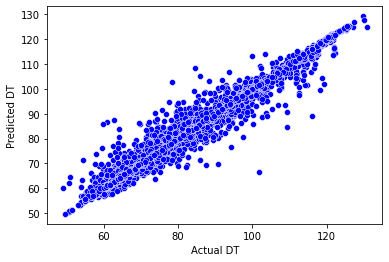

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = y_test, y = y_pred, color = 'blue')
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
plt.show();

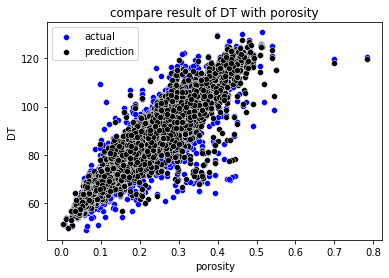

In [27]:
# check result with porosity
sns.scatterplot( x = X_test.iloc[:,-1],y = y_test, color = 'blue',label= 'actual')
sns.scatterplot(x = X_test.iloc[:,-1], y = y_pred, color = 'black', label = 'prediction')
plt.ylabel('DT')
plt.xlabel('porosity')
plt.title('compare result of DT with porosity')
plt.legend()
plt.show();

In [28]:
X.iloc[:, 0]

0        2922.5
1        2923.0
2        2923.5
3        2924.0
4        2924.5
          ...  
52699    4586.5
52700    4587.0
52701    4587.5
52702    4588.0
52703    4588.5
Name: Depth, Length: 52700, dtype: float64

In [29]:
X_test

,Depth,GR,PEF1,RHOB,NPHI
42703,3368.2,49.4023,7.2548,2.3373,0.2260
44687,2787.0,20.0768,7.2548,2.5265,0.1528
26507,2679.1,26.3908,5.0244,2.1700,0.2580
13906,3342.0,9.0687,9.0022,2.5400,0.1200
45511,2869.4,2.7892,7.2548,2.5078,0.1155
...,...,...,...,...,...
45220,2840.3,3.6744,7.2548,2.5183,0.1208
9036,2853.0,8.0421,8.7077,2.6490,0.0370
48247,3143.0,19.5290,7.2548,2.6207,0.0640
40564,3154.0,55.9023,7.2548,2.4699,0.1787


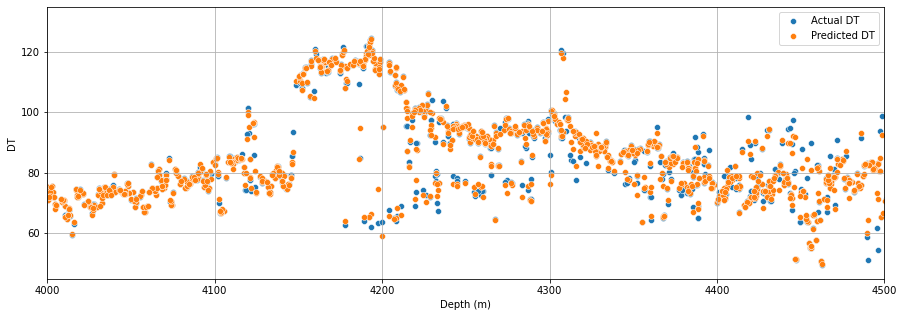

In [30]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = X_test.iloc[:, 0],y =  y_test, label='Actual DT')
sns.scatterplot(x = X_test.iloc[:, 0],y = y_pred, label='Predicted DT')
plt.xlabel('Depth (m)')
plt.ylabel('DT')
plt.xlim(4000, 4500)
plt.legend()
plt.grid()


## Validation of model
- for this we use well 15 dataset, which we save in different dataset(df3)
- now we don't needed to split data in train and test set because we already train our model , now we just validate our model

In [31]:
X_valid = df3.drop(['Well', 'DT'], axis = 1)
y_valid = df3.iloc[:, -1]
X_valid

,Depth,GR,PEF1,RHOB,NPHI
54786,3500.0,36.374,7.2548,2.4680,0.1694
54787,3500.5,27.346,7.2548,2.4460,0.1662
54788,3501.0,16.766,7.2548,2.4481,0.1660
54789,3501.5,19.357,7.2548,2.5120,0.1679
54790,3502.0,17.445,7.2548,2.4940,0.1536
...,...,...,...,...,...
55940,4083.5,59.706,7.2548,2.4851,0.1416
55941,4084.0,58.417,7.2548,2.4860,0.1416
55942,4084.5,57.499,7.2548,2.5311,0.1527
55943,4085.0,56.785,7.2548,2.4731,0.1785


- We have enough dataset for validate our result, size of validation dataset is 1159 * 6(row*columns)

In [32]:
y_valid_pred = rf.predict(X_valid)

print(f'mean abosulte error on validation set {mean_absolute_error(y_test, y_pred)}')

mean abosulte error on validation set 1.0012820517077794


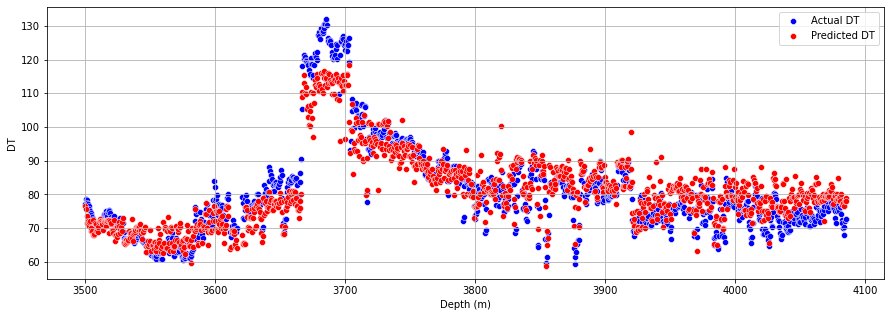

In [33]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = X_valid.iloc[:, 0],y =  y_valid, label='Actual DT', color = 'blue')
sns.scatterplot(x = X_valid.iloc[:, 0],y = y_valid_pred, label='Predicted DT', color = 'red')
plt.xlabel('Depth (m)')
plt.ylabel('DT')
plt.legend()
plt.grid()